# HW03

Some exercises with audio files and sample arrays.

## Goals

- More practice with lists
- Intro to _feature extraction_ (or, how to summarize audio information)
- Set up a simple classifier model
- Get familiar with using evaluation functions (accuracy)

### Import helpers

Run the following 2 cells to import helper functions, files and libraries

In [2]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/audio_utils.py

!wget -qO- https://github.com/PSAM-5020-2025S-A/5020-utils/releases/latest/download/instruments.tar.gz | tar xz

In [3]:
import matplotlib.pyplot as plt

from os import listdir, path
from random import choice

from IPython.display import Audio
from PIL import Image

from audio_utils import wav_to_list, list_to_wav
from audio_utils import fft, cluster_fft_freqs

from HW03_utils import HW03Utils

## Audio files and sample manipulation

Some exercises with audio files, representation and processing.

### Loading audio files

We'll use the pre-define helper function `wav_to_list()` to read a `.wav` file and put its samples in a list.

We can then get some info about this list, like its length, and what its samples look like.

In [ ]:
wv01 = wav_to_list("data/audio/secrets/secret_01.wav")

print(len(wv01))

print(wv01[:10])
print(wv01[-10:])
print(wv01[5000: 5010])

### We can visualize the sound wave using matplotlib

In [ ]:
plt.plot(wv01)
plt.show()

### Playing audio files

We can play audio files with the following command:

In [ ]:
display(Audio(wv01, rate=44100))

### Hmmm 🤔... 

The audio sounded incomplete, like it got chopped halfway through a sentence.

If we look at the plot above we can see that there is information in the second half, but it might just be too soft.

## Audio Representation Exercises

### Exercise 01

We'll have to go through the list of samples and amplify the second half of the audio to hear the hint for the next exercise.

We'll create a new list where we'll store the *fixed* samples, which we can then visualize and listen to.

In [ ]:
# Work on exercise 01 here

amp_wv = []

for i, sample in enumerate(wv01):
  # maybe look at the amplitude of the samples
  # or just amplify the samples on the second half of the list
  if i >= int(0.5 * len(wv01)):
    amp_wv.append(2 * sample)
print(amp_wv)

### Check Exercise 01

Run this cell to see the wave with the new samples and to play the fixed sound.

In [ ]:
plt.plot(amp_wv)
plt.show()

display(Audio(amp_wv, rate=44100))

This cell will use speech transcription to test the resulting waveform (might take up to $30$ seconds):

In [ ]:
HW03Utils.test_transcription("01", amp_wv)

To see what the message for exercise $01$ should be:

In [ ]:
HW03Utils.peek_secret("01")

### Sound 02

Better.

Well, here's the second sound. The previous audio gave a pretty good hint of how to fix it.

Let's load it and take a look/listen:

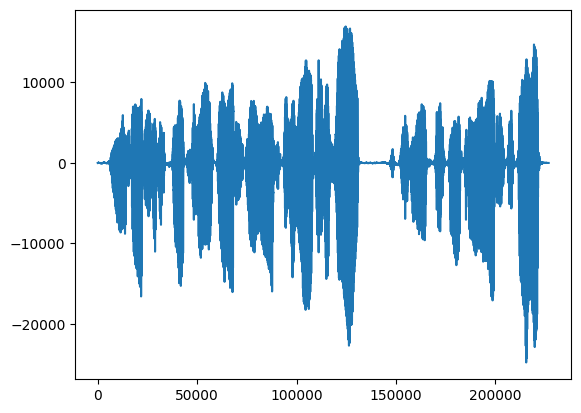

In [4]:
wv02 = wav_to_list("data/audio/secrets/secret_02.wav")

plt.plot(wv02)
plt.show()

display(Audio(wv02, rate=44100))

### Exercise 02

We'll have to turn it around.

Again, we'll create a new list where we'll store the *fixed* samples, so later we can visualize and listen to them.

The cell below is a suggestion of how to go about doing this, but there are many other ways. Feel free to implement this using a different method.

In [5]:
# Work on exercise 02 here

rev_wv = []

for i, sample in enumerate(wv02):
  # as we go through the indexes 0, 1, 2, etc ...
  # what index should the new samples be coming from ?

  rev_wv.append(wv02[-(i + 1)])
print(rev_wv)


[0, 0, 0, 0, 0, -1, 2, -2, 2, -2, 1, 0, -1, 2, -2, 1, 0, -1, 1, 0, -1, 2, -3, 3, -2, 2, -2, 2, -3, 4, -3, 1, 0, 0, 0, 0, -1, 1, 0, 0, -1, 1, -1, 2, -2, 1, 0, -1, 2, -1, 0, 0, 0, 1, -2, 3, -4, 4, -3, 2, -1, 0, 0, 0, -1, 3, -4, 4, -4, 3, -1, -1, 2, -2, 2, -1, -1, 2, -1, 0, 1, -2, 2, -2, 2, -2, 2, -2, 1, -1, 2, -3, 3, -2, 1, -1, 1, -1, 0, 1, -2, 2, -1, 0, 0, 0, -1, 2, -2, 2, -2, 1, 0, 0, 0, 0, 0, -1, 2, -2, 2, -2, 2, -2, 1, 0, 0, 0, 1, -2, 1, 1, -1, 0, 1, -2, 3, -3, 2, -1, 0, 1, -1, 0, 1, -2, 2, -1, 1, -1, 0, 0, 1, -1, 1, -2, 3, -3, 2, -2, 2, -2, 2, -2, 1, 1, -3, 4, -5, 5, -4, 3, -2, 0, 1, -1, 0, 1, -1, 0, 1, -2, 3, -3, 3, -4, 4, -3, 2, -1, 1, -1, 0, 0, 0, 1, -1, 1, -2, 2, -1, 0, 0, 1, -2, 3, -4, 4, -3, 2, -1, 0, 1, -2, 3, -3, 2, 0, -2, 3, -3, 2, 0, -1, 1, -1, 1, -1, 0, 2, -3, 3, -3, 2, 0, -1, 1, -1, 0, 2, -3, 3, -2, 1, 0, 0, -1, 2, -2, 1, 0, -1, 1, -1, 1, -1, 1, -1, 0, 1, 0, -1, 2, -3, 2, -1, 1, 0, -2, 3, -4, 5, -5, 4, -3, 2, -1, 0, 1, -2, 2, -2, 2, -2, 2, -2, 2, -2, 1, 0, 0, 0, 0, -1, 1

### Check Exercise 02

Run this cell to see the wave with the new samples and to play the fixed sound.

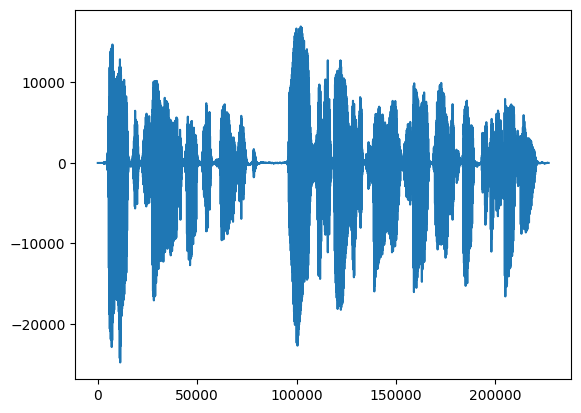

In [6]:
plt.plot(rev_wv)
plt.show()

display(Audio(rev_wv, rate=44100))

In [ ]:
HW03Utils.test_transcription("02", rev_wv)

### Sound 03

Let's keep going. Here's sound 3. Let's take a look and a listen.

### ❗️❗️ WARNING ❗️❗️
This audio file is kind of distorted and loud. Turn down or remove headphones.

In [ ]:
wv03 = wav_to_list("data/audio/secrets/secret_03.wav")

plt.plot(wv03)
plt.show()

display(Audio(wv03, rate=44100))

### Exercise 03

Ok. We have to move the smallest-valued samples of the wave.

First we have to figure out the value of the smallest sample, then go through the list of samples and move them back to the center.

In [ ]:
# Work on exercise 03 here

up_wv = []

for sample in wv03:
  # as we go through the samples,
  # we have to bring some of them "up" somehow
  if sample <= 0:
    up_wv.append(0)
  else:
    up_wv.append(sample)

print(up_wv)


### Check Exercise 03

Run this cell to see the wave with the new samples and to play the fixed sound.

In [ ]:
plt.plot(up_wv)
plt.show()

display(Audio(up_wv, rate=44100))

In [ ]:
HW03Utils.test_transcription("03", up_wv)

### Sound 04

And here's sound 4.

In [ ]:
wv04 = wav_to_list("data/audio/secrets/secret_04.wav")

plt.plot(wv04)
plt.show()

display(Audio(wv04, rate=44100))

### Exercise 04

We'll have to sub-sample the list.

Again, we'll create a new list where we'll store the *fixed* samples, so later we can visualize and listen to them.

And like before, there are multiple ways of solving this. Feel free to do it differently.

In [ ]:
# Work on exercise 04 here

unzip_wv = []

for i, sample in enumerate(wv04):
  # as we go through the list, we only keep some of the samples
  # the mod operator (%) can help here
  if i % 13 == 0:
    unzip_wv.append(sample)
print(unzip_wv)


### Check Exercise 04

Run this cell to see the wave with the new samples and to play the fixed sound.

In [ ]:
plt.plot(unzip_wv)
plt.show()

display(Audio(unzip_wv, rate=44100))

In [ ]:
HW03Utils.test_transcription("04", unzip_wv)

### Sound 05

So for this last one, the sound file or list of samples is actually the same one that was decoded above.


In [102]:
# slicing the whole list makes a copy of it
wv05 = unzip_wv[:]

### Exercise 05

We'll have to sub-sample the list again. It's the same strategy, and possibly the same code as above.

We'll create a new list with the *fixed* samples, but that's only the first step. We'll take a look at the result and continue processing afterwards.

In [103]:
# Work on exercise 05 here

sample_wv = []

for i, sample in enumerate(wv05):
  # as we go through the list, we only keep some of the samples
  # the mod operator (%) can help here
  if i % 13 == 0:
    sample_wv.append(sample)


### Check Exercise 05

Run this cell to see the wave with the new samples and to play the fixed sound.

In [ ]:
plt.plot(sample_wv)
plt.show()

display(Audio(sample_wv, rate=44100))

That looks and sounds very different from previous decoded messages, because it's not sound.

### Continue Exercise 05

In order to re-interpret these samples as an image we have to first count how many samples our new list has, and use that to determine the size of our square image.

Since an $n \times n$ image has $n^2$ pixels, if our list has $16$ samples our image will be $4 \times 4$, if it has $1024$ samples, it will be $32 \times 32$, etc.

Since $\sqrt{n} = n^{0.5}$, in python we can take the square root of a number by doing `n ** 0.5`.

In [107]:
# fill this out with the image dimension based on the number of samples in the sample_wv list
# the image dimension is the square root of the length of the list of samples

img_dim = len(sample_wv)**0.5

### And finally...

Now we can run this cell to put the samples we got from the sound file into an image and display it.

The cell below creates an empty $n x n$ image and then copies the samples from the decoded sound wave into it as pixel color information.

In [ ]:
im = Image.new("L", (int(img_dim), int(img_dim)))
im.putdata(sample_wv)
display(im)

This is just to give a little preview of what it's like to work with images, and how it's possible to re-interpret sound as images and images as sound. It's all lists of bytes after all.

We'll definitely look at more image examples next week.

## Sound Classification Exercise

Now for something a bit different...

I messed up a script to synthesize audio files from `midi` files and the output filenames came out all wrong as numbers.

# 😓

There are a bunch of audio files inside the `data/audio/instruments/test` directory that I want to separate by instrument. I could do this by listening to each file, but since there are almost $100$ files, I'd rather not.

Luckily, some files were exported with correct names. Those are in the `data/audio/instruments/train` directory.

Our task for this exercise is to take a look at the correctly labeled files in the `train` directory, do some analysis on their waveforms, and see if there are any patterns or properties that we could use to automatically re-label the files in the `test` directory.

Let's break this down into steps.

### 01A. Reading all the labeled files

Let's first look at how we can read all of the files in the `data/audio/instruments/train` directory.

We are going to use the `Python` system function `listdir()` for listing files in a directory.

In [109]:
# Declare location of train files
TRAIN_PATH = "data/audio/instruments/train"

# List comprehension for getting all of the filenames that end in "wav" inside the train directory
train_files = [f for f in listdir(TRAIN_PATH) if f.endswith("wav")]

### Checking our list

Take a look at the `train_files` list.

How many files are there?

How are the file names formatted ?

In [ ]:
# print the size of the train_files list here, along with some of its contents
print(len(train_files))
print(train_files[:10])

### 01B. Reading all the unlabeled files

Repeat the above steps to get the names of all of the files inside the `data/audio/instruments/test` directory.

How many files are there?

How are the files named?

Print the number of files in the directory and their names below.

In [ ]:
# Fill out the values for these two variables

# Declare location of test files
TEST_PATH = "data/audio/instruments/test"

# Get all of the filenames that end in "wav" inside the test directory
test_files = [f for f in listdir(TEST_PATH) if f.endswith("wav")]

# Print the number of files inside the list and some of its contents
print(len(test_files))
print(test_files[:10])

### 02A. Iterating through the files

Let's iterate through all of the files in `train_files`, open them, and get the number of samples in each file.

In order to analyze, plot and process our data later, let's keep track of the number of samples and the name of the file in a list with the following format:

```py
file_info = [
  [value, filename],
  [value, filename],
  ...
]
```

So, `file_info` is a list of lists, where each inner list has two members, `value`, which is some numeric info about the audio in that file, and `filename`, which is the name of the file.

For now, the `value` we are interested in extracting is the length of each audio file.

We'll use the `Python` function `path.join()` to get the full path of the files inside our `train_files` list.

In [ ]:
# list to keep info about audio files
length_info_train = []

# iterate through all of the filenames inside the train files list
for fname in train_files:
  # this gets us the full location path for the filename
  fpath = path.join(TRAIN_PATH, fname)

  # open the file and read its samples into an array
  samples = wav_to_list(fpath)

  # get value of interest (number of samples in file)
  val = len(samples)

  # store the info using the format specified above
  length_info_train.append([ val, fname ])

# check that we processed all files. This should be as long as the train_files list
print(len(length_info_train))

### 02B. Repeat for `test` files

Repeat the above process using the test files.

In [ ]:
# list to keep info about audio files
length_info_test = []

# iterate through all of the filenames inside the test files list
for fname in test_files:

  # get full location path for the filename
  fpath = path.join(TEST_PATH, fname)

  # open the file and read its samples into an array
  samples = wav_to_list(fpath)

  # get value of interest (number of samples in file)
  val = len(samples)

  # store the info using the format specified above: [value, filename]
  length_info_test.append([ val, fname ])
# check that we processed all files. 
print(len(length_info_test))
# the test_file_info list should be as long as the test_files list
print(len(test_files))

### 03A. Taking a look at the `train` data

Let's plot the info we extracted above.

There's a `plot_labels_vals()` function inside the `HW03Utils` class that will plot the values in our `file_info` lists.

We just have to call the function with a list of `[value, filename]` elements, and a title for our graph.

If the `filename` used contains information about the instrument label it will group values by instruments.


In [ ]:
HW03Utils.plot_labels_vals(length_info_train, "Train file lengths")

# 🤔

This graph is a bit hard to read at first, but if we remember that the values we are plotting are the length of the files in samples, we can see that all of our files have between $86000$ and $87000$ samples.

And more importantly, there's no correlation between the length of the files and the type of instrument.

### 03B. Repeat for the `test` data

Remember that the x-axis represents the number of samples in each file and the y-axis is the file name.

In [ ]:
# plot file name versus length of file for the test data
HW03Utils.plot_labels_vals(length_info_test, "Test file lengths")

The resulting plot is not super useful, but it should confirm that there's no pattern in the file lengths.

It's always a good idea to plot any and all information about our data because sometimes we get lucky and find some pattern that is easy to extract and use.

### 04. Looking at other data

Let's repeat the process of extracting info from our files, but this time let's grab the value of the first sample in each file.

In [ ]:
# list to keep info about audio files
sample_info_train = []

# iterate through all of the filenames inside the train files list
for fname in train_files:
  # this gets us the full location path for the filename
  fpath = path.join(TRAIN_PATH, fname)

  # open the file and read its samples into an array
  samples = wav_to_list(fpath)

  # get value of interest (value of first sample)
  val = samples[0]

  # store the info using the format specified above
  sample_info_train.append([ val, fname ])

# check that we processed all files. This should be as long as the train_files list
print(len(sample_info_train))

HW03Utils.plot_labels_vals(sample_info_train, "Train first sample")

# 🤨

It's not super clear, but there's something of a pattern here.

The first sample values show some correlation to the instrument.

We could plot something similar with the test data, but let's build a model for classifying instruments based on this data.

### 05. Create a model

Let's use the info in the graph and create a function that outputs the instrument label based on the value of the first sample.

If the first sample is between $-1000$ and $100$ we'll say it's a `piano`, if it's between $100$ and $4500$ we'll label it `guitar`, otherwise it's a `clarinet`.

It won't be perfect, but we can check how close we get with just this small amount of information.

In [122]:
# function that takes samples of a file and returns a label
def first_sample_classifier(samples):
  first_sample = samples[0]
  if first_sample > -1000 and first_sample < 100:
    return "piano"
  elif first_sample > 100 and first_sample < 4500:
    return "guitar"
  else:
    return "clarinet"

### Random classifier

We're also gonna create a random classifier to use as a baseline for comparisons later.

The random classifier just guesses a label randomly. Our model should do better than random guesses.

In [123]:
# random classifier to use for comparisons
def random_classifier(_):
  # the choice() function selects a random element from a list
  return choice(["clarinet", "guitar", "piano"])

### 06. Run classification on `train` data

Let's iterate through all the train files again, and this time instead of saving the first sample value and the filename in the list, we'll save our calculated label and the filename.

```py
first_sample_predictions = [
  [label, filename],
  [label, filename],
  ...
]
```

We'll also keep track of classifications made by the `random_classifier`.

In [ ]:
# list to keep info about predictions
first_sample_predictions_train = []

# list to keep info about random predictions
random_predictions_train = []

# iterate through all of the filenames inside the train files list
for fname in train_files:
  # this gets us the full location path for the filename
  fpath = path.join(TRAIN_PATH, fname)

  # open the file and read its samples into an array
  samples = wav_to_list(fpath)

  # get prediction using model defined above
  prediction = first_sample_classifier(samples)

  # get prediction using random classifier defined above
  random_prediction = random_classifier(samples)

  # store the prediction and filename
  first_sample_predictions_train.append([ prediction, fname ])

  # store the random prediction and filename
  random_predictions_train.append([ random_prediction, fname ])

# check that we processed all files. This should be as long as the train_files list
print(len(first_sample_predictions_train))

# look at first couple of predictions just to check that our format is correct
print(first_sample_predictions_train[:3])

### 07. Check accuracy on `train` data

We could go through the list and extract the correct label information from the filename to check our predictions, but luckily our `HW03Utils` class has a function that does that.

We just have to call `classification_accuracy()` with our list of labels and filenames.

We can also call it with the random predictions to see how we compare to randomly guessing labels.

In [ ]:
print("Sample Classifier", HW03Utils.classification_accuracy(first_sample_predictions_train))
print("Random Classifier", HW03Utils.classification_accuracy(random_predictions_train))

Not bad. Our model predicts the correct instrument about half of the time, which is better than randomly guessing an instrument and getting it right $33\%$ of the time.

Let's see how it performs on the actual `test` data.

### 08. Run model on `test` data and check accuracy

Repeat the above, but using the `test` data files.

Don't worry about keeping track of random classifications this time.

In [ ]:
# list to keep info about predictions
first_sample_predictions_test = []

# iterate through all of the filenames inside the test files li
for fname in test_files:
  # get full location path for the filename
  fpath = path.join(TEST_PATH, fname)
  # open the file and read its samples into an array
  samples = wav_to_list(fpath)
  # get prediction using model defined above
  prediction = first_sample_classifier(samples)
  # store the prediction and filename
  first_sample_predictions_test.append([ prediction, fname ])
# check that we processed all files. This should be as long as the test_files list
print(len(first_sample_predictions_test))
# look at first couple of predictions just to check that our format is correct
print(first_sample_predictions_test[:3])
# check accuracy

# 🎉

Not bad. This simple model performs ok for some of the instruments.

Let's improve it.

### Repeat steps $04$ through $08$

This time, consider other aspects of the audio data to build a better model.

Maybe the absolute value of the first sample can be used to better label the audio. Maybe the value of the loudest sample or the value of the softest sample of each file can tell us something about the instrument. Maybe the overall range of the sample values...

Maybe the `Root Mean Square Energy` or the `Zero-Crossing Rate` of our samples could be used.

Maybe the frequency content has some information about the instrument. We could use the `fft()` and `cluster_fft_freqs()` functions from our `WK03` / `WK04` notebooks to get the dominant frequencies of our audio files.

Our new model won't be perfect. Pick a couple of these strategies to experiment with and just confirm that it performs better than the random classifier that guesses the instrument.

### Analyze data

Take a look at other properties of the `train` audio files.

The loop below is mostly filled out, but the `val` variable has to be calculated using some other information from our audio data.

In [ ]:
# list to keep info about audio files
audio_info_train = []

def get_rms(sample):
    return (sum(v**2 for v in sample)/len(sample))** 0.5

# iterate through all of the filenames inside the train files list
for fname in train_files:
  # this gets us the full location path for the filename
  fpath = path.join(TRAIN_PATH, fname)

  # open the file and read its samples into an array
  samples = wav_to_list(fpath)

  # TODO: get value of interest !!!!
  val = get_rms(samples)

  # store the info using the format specified above
  audio_info_train.append([ val, fname ])

HW03Utils.plot_labels_vals(audio_info_train, "Train: some new feature")

### Build model

Fill in the function below to create a better classifier based on the analysis done above.

In [132]:
# returns a label based on __??????__
def awesome_classifier(samples):
  # TODO: fill out this function !!!
  return "piano"

### Run on `train` and `test` data and check accuracy

This cell is already filled out correctly, we just have to run it to get the accuracy values for our model.

Our model won't be perfect, but it should perform better than the `random_classifier` model on the `test` data.

In [ ]:
# lists to keep info about predictions
train_model_predictions = []
test_model_predictions = []
test_random_predictions = []

# iterate through all of the filenames inside the train files list
for fname in train_files:
  # open the file and read its samples into an array
  samples = wav_to_list(path.join(TRAIN_PATH, fname))

  # get prediction using awesome model defined above
  model_prediction = awesome_classifier(samples)

  # store the predictions and filename
  train_model_predictions.append([ model_prediction, fname ])


print("Train Accuracy")
print("\tAwesome", HW03Utils.classification_accuracy(train_model_predictions))


# iterate through all of the filenames inside the test files list
for fname in test_files:
  # open the file and read its samples into an array
  samples = wav_to_list(path.join(TEST_PATH, fname))

  # get prediction using random classifier
  random_prediction = random_classifier(samples)
  # get prediction using awesome model defined above
  model_prediction = awesome_classifier(samples)

  # store the predictions and filename
  test_random_predictions.append([ random_prediction, fname ])
  test_model_predictions.append([ model_prediction, fname ])


print("\nTest Accuracy")
print("\tRandom", HW03Utils.classification_accuracy(test_random_predictions))
print("\tAwesome", HW03Utils.classification_accuracy(test_model_predictions))